In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join as opj

In [2]:
DIR_PATH = "/home/st-gorbatovski/sollama/src/sft/artifacts/tests/python_basics"

In [10]:
# base = pd.read_csv(opj(DIR_PATH, "test-base_llama-7b-max_prompt_length_768-basics.csv"))
# accepted = pd.read_csv(opj(DIR_PATH, "test-LoRA_llama_accepted_only-7b-max_prompt_length_768-basics.csv"))
# no_zero = pd.read_csv(opj(DIR_PATH, "test-LoRA_llama_no_0_scores-7b-max_prompt_length_768-basics.csv"))
# short_answers = pd.read_csv(opj(DIR_PATH, "test-LoRA_llama_no_0_scores-7b-max_prompt_length_512-t_09-basics.csv"))

short_base = pd.read_csv('/home/st-gorbatovski/sollama/src/sft/artifacts/tests/python_basics/test-base_llama-7b-max_prompt_length_512-basics-t_09-3_attepts.csv')
rlfh_cos_sim = pd.read_csv('/home/st-gorbatovski/sollama/src/sft/artifacts/tests/python_basics/rlhf/test-rlhf-LoRA_llama-7b-max_prompt_length_512-t_09-basics-mpnet_cos_sim_so_only.csv')
# rlfh_dot_prod = pd.read_csv('/home/st-gorbatovski/sollama/src/sft/artifacts/tests/python_basics/rlhf/test-rlhf-LoRA_llama-7b-max_prompt_length_512-t_09-basics-mpnet_dot_prod_step_43.csv')
no_zero_merged = pd.read_csv("/home/st-gorbatovski/sollama/src/sft/artifacts/tests/python_basics/test-LoRA_llama-7b-bs_64-lr_1e4-basics-no_zero-v4-t_09-3_attepmts-merged.csv")
# short_answers = pd.read_csv("/home/st-gorbatovski/sollama/src/sft/artifacts/tests/python_basics/test-LoRA_llama-7b-bs_64-lr_1e4-basics-no_zero-v4-t_09-3_attepmts.csv")

rlhf_cos_dist_cos_sim = pd.read_csv("/home/st-gorbatovski/sollama/src/sft/artifacts/tests/python_basics/rlhf/test-rlhf-LoRA_llama-7b-max_prompt_length_512-t_09-basics-mpnet_cos_dist_so_par-cos_sim-step_353-reward_0.46-3_attempts.csv")
rlhf_dot_prod_cos_sim = pd.read_csv("/home/st-gorbatovski/sollama/src/sft/artifacts/tests/python_basics/rlhf/test-rlhf-LoRA_llama-7b-max_prompt_length_512-t_09-basics-mpnet_dot_prod_so_par-cos_sim-step_319-reward_0.62-3_attempts.csv")

rlhf_dot_prod_cos_sim_length_penalty = pd.read_csv("/home/st-gorbatovski/sollama/src/sft/artifacts/tests/python_basics/rlhf/test-rlhf-LoRA_llama-7b-t_09-basics-mpnet_dot_prod_so_par-cos_sim-length_penalty-step_261-mean_reward_0.48-3_attempts.csv")
rlhf_dot_prod_dot_prod_length_penalty = pd.read_csv("/home/st-gorbatovski/sollama/src/sft/artifacts/tests/python_basics/rlhf/test-rlhf-LoRA_llama-7b-t_09-basics-mpnet_dot_prod_so_par-dot_prod-length_penalty-step_72-mean_reward_39.2-3_attempts-temp_0.7.csv")

short_answers_par = pd.read_csv("/home/st-gorbatovski/sollama/src/sft/artifacts/tests/python_basics/test-sft-LoRA_llama-7b-max_prompt_length_512-t_09-basics-paraphrased-3_attempts.csv")

In [11]:
datasets = [
    short_base,
    no_zero_merged,
    short_answers_par,
    rlfh_cos_sim,
    rlhf_cos_dist_cos_sim,
    rlhf_dot_prod_cos_sim,
    rlhf_dot_prod_cos_sim_length_penalty,
    rlhf_dot_prod_dot_prod_length_penalty,
]
names = [
    "GP LLaMA Python Basics, temp 0.9",
    "LoRA LLaMA Python Basics no zero, temp 0.9, merged",
    "LoRA LLaMA Python Basics no zero, temp 0.9, SO PAR",
    "RLHF LoRA LLaMA Python Basics cos_sim SO only",
    "RLHF LoRA LLaMa Python Basics cos_dist cos_sim PPO SO Par",
    "RLHF LoRA LLaMa Python Basics dot prod cos_sim PPO SO Par",
    "RLHF LoRA LLaMa Python Basics dot_prod cos_sim PPO SO Par, length penalty",
    "RLHF LoRA LLaMa Python Basics dot_prod dot_prod PPO SO Par, length penalty, t 0.7",
]
datasets = [df[df["log_score"] >= 0] for df in datasets]

In [12]:
from transformers import LlamaTokenizer

tokenizer = LlamaTokenizer.from_pretrained("/raid/models/llama-7b-python_basics-fp32")

In [13]:
for df in datasets:
    df['gen_length'] = df['Generated Answer'].apply(lambda x: len(x))
    df['gen_tokens'] = df['Generated Answer'].apply(lambda x: len(tokenizer(x)['input_ids']))

/tmp/ipykernel_1054922/197146330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gen_length'] = df['Generated Answer'].apply(lambda x: len(x))
/tmp/ipykernel_1054922/197146330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gen_tokens'] = df['Generated Answer'].apply(lambda x: len(tokenizer(x)['input_ids']))
/tmp/ipykernel_1054922/197146330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [14]:
def generate_heatmap(datasets, names, columns, absolute=True):
    """
    Функция для построения heatmap на основе данных из переданных файлов.

    Parameters:
        datasets (list): Список наборов данных, каждый элемент которого представляет собой pandas.DataFrame.
        names (list): Список имен наборов данных.
        columns (list): Список столбцов, которые необходимо учитывать при построении heatmap.
        absolute (bool): Если True, используются абсолютные значения. Если False, вычисляются процентные изменения.

    Returns:
        None.
    """
    
    processed_datasets = []
    for dataset in datasets:
        avg_dataset = dataset.groupby('Gen_Q_Id')[columns].mean().reset_index()
        processed_datasets.append(avg_dataset)
    
    df = pd.concat(processed_datasets, axis=0, ignore_index=True)
    dataset_col = []
    for dataset, name in zip(processed_datasets, names):
        dataset_col.extend([name] * len(dataset))
    df['Dataset'] = dataset_col
    
    means = df.groupby(['Dataset'], sort=False)[columns].mean().reset_index()
    stds = df.groupby(['Dataset'], sort=False)[columns].std().reset_index()

    # Вспомогательная функция для аннотации heatmap
    def annotate_data(data, **kws):
        n = len(data.columns)
        m = len(data.index)
        for i in range(m):
            for j in range(n):
                if absolute:
                    val = f"{data.iloc[i, j]:.4f}\n±{stds.iloc[j, i+1]:.4f}"
                else:
                    val = f"{data.iloc[i, j]:.2f}%"
                plt.gca().text(j + .5, i + .5, val, 
                               color='black', ha="center", va="center", 
                               fontsize=9, bbox=dict(facecolor='white', edgecolor='none', boxstyle="square,pad=0"))

    if not absolute:
        for col in columns:
            means[col] = (means[col] - means[col].iloc[0]) / means[col].iloc[0] * 100
    
    plt.figure(figsize=(10, 5))
    
    ax = sns.heatmap(means.iloc[:, 1:].transpose(), cmap='crest', cbar=False, annot_kws={"fontsize": 0})

    # Применяем функцию аннотации
    annotate_data(means.iloc[:, 1:].transpose())

    ax.set_xticklabels(means['Dataset'], rotation=90)
    ax.set_yticklabels(means.columns[1:], rotation=0)
    ax.set_xlabel('Models')
    ax.set_ylabel('Metric')
    ax.set_title('Comparison of models performance')

    plt.show()

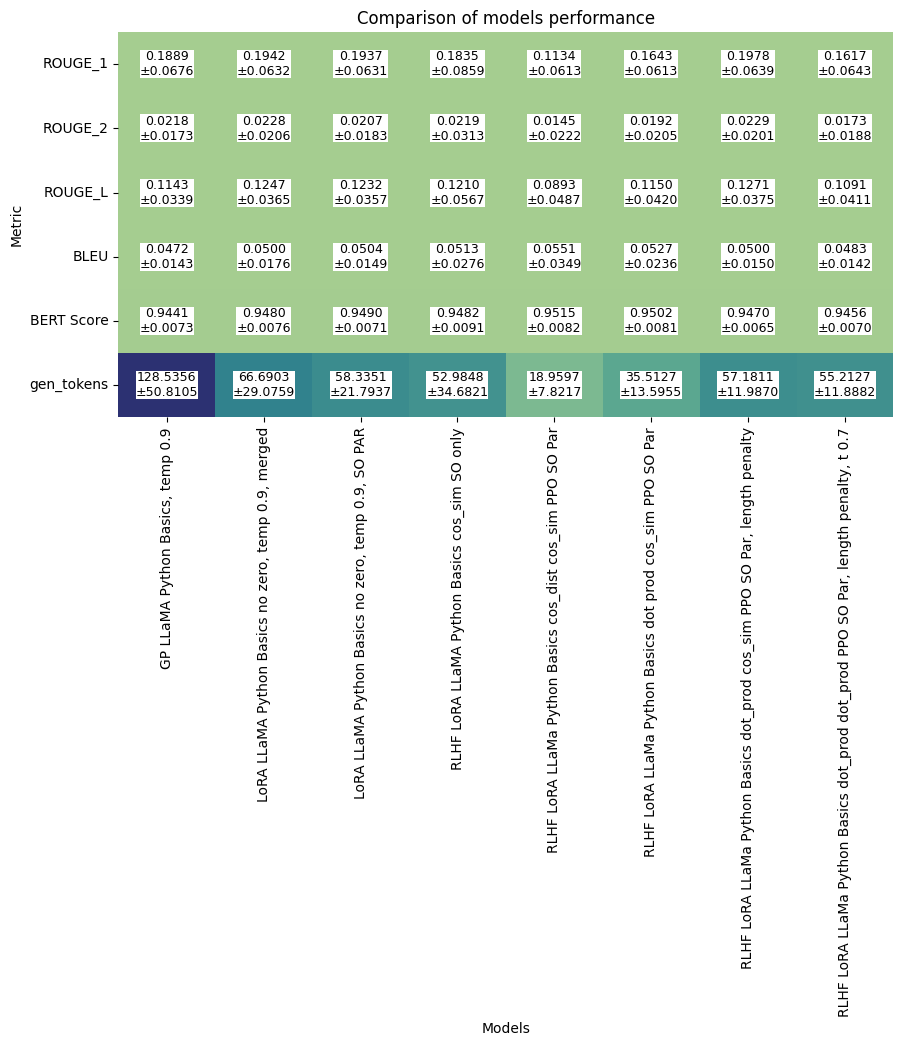

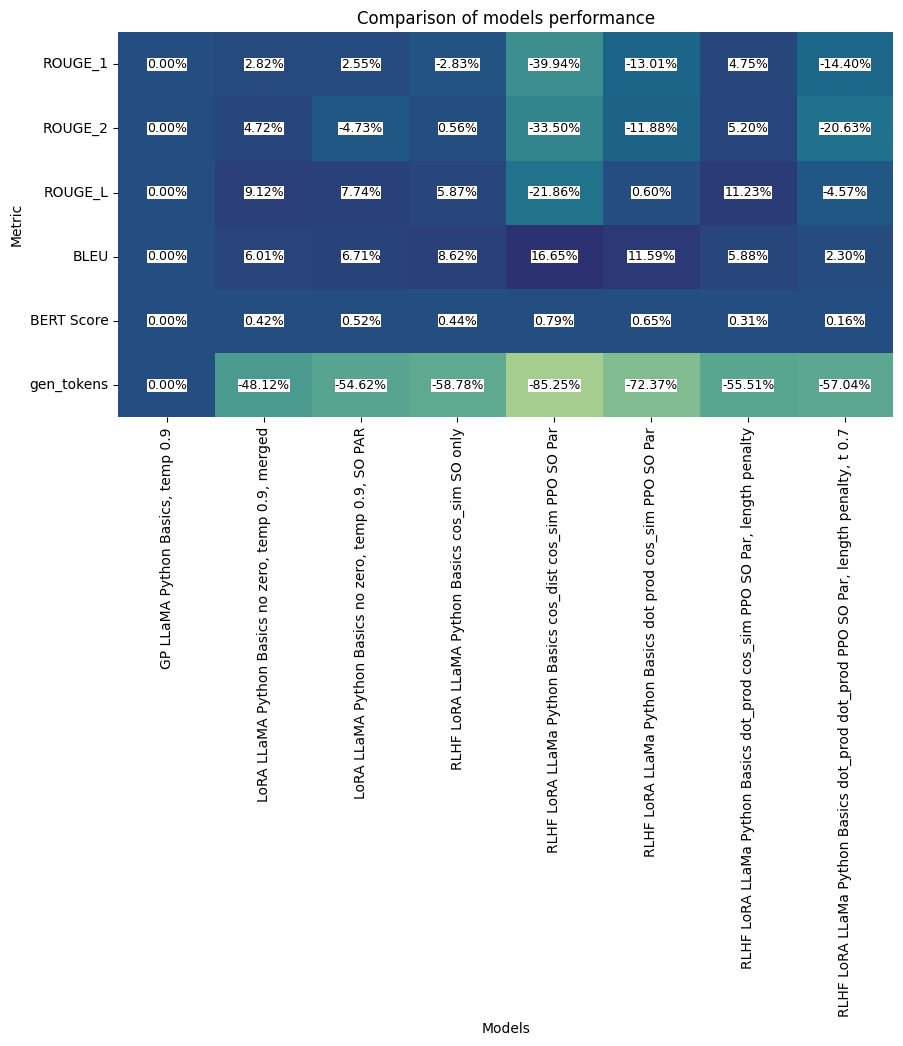

In [15]:
generate_heatmap(
    datasets,
    names,
    ["ROUGE_1", "ROUGE_2", "ROUGE_L", "BLEU", "BERT Score", "gen_tokens"],
)
generate_heatmap(
    datasets,
    names,
    ["ROUGE_1", "ROUGE_2", "ROUGE_L", "BLEU", "BERT Score", "gen_tokens"],
    False,
)